In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
import os
os.environ["KAGGLE_USERNAME"]="shikha999"
os.environ["KAGGLE_KEY"]="bf126ba2ab6c73d8a2fb9658860f18e1"
!kaggle datasets download -d dhirensk/cats-vs-dogs-training8000test2000

100% 435M/436M [00:15<00:00, 36.5MB/s]
100% 436M/436M [00:15<00:00, 28.6MB/s]


In [27]:
import os

# Directory path to the Kaggle input
input_directory = '/kaggle/input/'

# Function to list CSV files in the directory and its subdirectories
def list_csv_files(directory):
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith('.csv'):
                print(os.path.join(dirname, filename))

# Call the function to list CSV files in the '/kaggle/input/' directory
list_csv_files(input_directory)

In [28]:
 # Step 1: Install and configure the Kaggle API
!pip install kaggle

# Import the necessary libraries
import os
import zipfile

# Step 2: Download the dataset using the Kaggle API
# Replace 'your_username' and 'your_api_key' with your Kaggle credentials
os.environ['KAGGLE_USERNAME'] = "shikha999"
os.environ['KAGGLE_KEY'] ="bf126ba2ab6c73d8a2fb9658860f18e1"

# Replace 'dataset_name' with the name of the dataset on Kaggle
!kaggle datasets download -d dhirensk/cats-vs-dogs-training8000test2000

# Step 3: Extract the contents of the downloaded zip file
# Replace 'your_zip_file.zip' with the name of the downloaded zip file
zip_file_name = '/content/cats-vs-dogs-training8000test2000.zip'
extracted_folder_name = 'extracted_data'

# Create a directory to extract the files
os.makedirs(extracted_folder_name, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_name)

# List the extracted files
extracted_files = os.listdir(extracted_folder_name)
print("Extracted files:", extracted_files)


cats-vs-dogs-training8000test2000.zip: Skipping, found more recently modified local copy (use --force to force download)
Extracted files: ['MSR-LA - 3467.docx', 'readme[1].txt', 'PetImages', 'dataset']


In [29]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [30]:
Images_Weight = 128
Images_Height = 128
Image_size = (Images_Weight, Images_Height)
Image_Channels=3

In [31]:
filenames = "/content/cats-vs-dogs-training8000test2000.zip"

categories = []
for f_name in filenames:
  category = f_name.split('.')[0]
  if categories == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,\
     Dropout, Flatten,Dense,Activation,\
     BatchNormalization

model = Sequential()
model.add(Conv2D(32,
                 (3,3), activation='relu',input_shape=
                 (Images_Weight, Images_Height, Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 61, 61, 64)      

In [34]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopping = EarlyStopping(patience = 10)
learning_rate = ReduceLROnPlateau(monitor = "val_acc" , verbose = 1, patience =2, factor = 0.5, min_lr = 0.00001)
callbacks = [earlystopping, learning_rate]

In [35]:
df["category"] = df["category"].replace({'cat':0, 'dog':1})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
validate_train = validate_df.shape[0]
batch_size = 15

In [36]:
import pandas as pd

# Define the test_df dataframe with filename and category columns
test_df = pd.DataFrame({
    "filename": ["test_image1.jpg", "test_image2.jpg", ...],  # List of test image filenames
    "category": ["cat", "dog", ...]  # Corresponding categories
})

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator=train_datagen.flow_from_directory(
    "/content/extracted_data/dataset/training_set",
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [38]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

validation_generator=test_datagen.flow_from_directory(
    "/content/extracted_data/dataset/test_set",
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [39]:
#build CNN model
#Initialize
import tensorflow as tf
cnn= tf.keras.models.Sequential()

In [40]:
#convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

In [41]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [42]:
#add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))


cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [43]:
#flatten
cnn.add(tf.keras.layers.Flatten())

In [44]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation= 'relu'))

In [45]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation= 'sigmoid'))

In [46]:
#compile the model
cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
#train the model
history=cnn.fit(x=train_generator,
        validation_data= validation_generator,
        epochs=5)

Epoch 1/5
250/250 [==============================] - 81s 317ms/step - loss: 0.6613 - accuracy: 0.5979 - val_loss: 0.5864 - val_accuracy: 0.6975
Epoch 2/5
250/250 [==============================] - 78s 308ms/step - loss: 0.5845 - accuracy: 0.6881 - val_loss: 0.5720 - val_accuracy: 0.7040
Epoch 3/5
250/250 [==============================] - 69s 275ms/step - loss: 0.5543 - accuracy: 0.7172 - val_loss: 0.5401 - val_accuracy: 0.7485
Epoch 4/5
250/250 [==============================] - 68s 270ms/step - loss: 0.5189 - accuracy: 0.7402 - val_loss: 0.4948 - val_accuracy: 0.7650
Epoch 5/5
250/250 [==============================] - 66s 263ms/step - loss: 0.4981 - accuracy: 0.7540 - val_loss: 0.4910 - val_accuracy: 0.7535


In [48]:
#make single prediction
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
test_image= load_img("/content/extracted_data/dataset/single_prediction/cat_or_dog_1.jpg", target_size=(64,64))
test_image=img_to_array(test_image)
test_image= np.expand_dims(test_image, axis=0)
result= cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
  prediction = "dog"
else:
  prediction = "cat"
prediction

1/1 [==============================] - 0s 145ms/step


'dog'

In [49]:
#make single prediction
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img
test_image= load_img("/content/extracted_data/dataset/single_prediction/cat_or_dog_2.jpg", target_size=(64,64))
test_image=img_to_array(test_image)
test_image= np.expand_dims(test_image, axis=0)
result= cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
  prediction = "dog"
else:
  prediction = "cat"
prediction

1/1 [==============================] - 0s 27ms/step


'cat'

In [54]:
import matplotlib.pyplot as plt
print(Hhistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


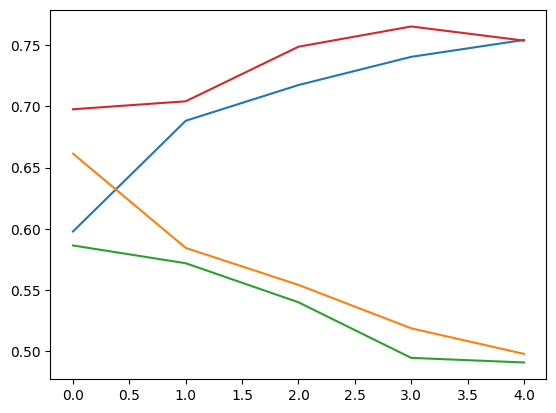

In [55]:
plt.plot(Hhistory.history['accuracy'])
plt.plot(Hhistory.history['loss'])
plt.plot(Hhistory.history['val_loss'])
plt.plot(Hhistory.history['val_accuracy'])